We first load all our modules

In [3]:
import pandas as pd
import numpy as np


Load the dataset -

In [4]:
file_name_train = './train.csv'
train = pd.read_csv(file_name_train)

file_name_test = './test.csv'
test = pd.read_csv(file_name_test)

## Exploratory Data Analysis

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's have a sneak peak at the data

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



#### Data Dictionary:

1. Survival : 
0 = No, 1 = Yes

2. pclass :Ticket class;
1 = 1st, 2 = 2nd, 3 = 3rd

3. Sex

3. Age in years

4. sibsp : 
No. of siblings / spouses aboard the Titanic

5. parch :
No. of parents / children aboard the Titanic

6. ticket: Ticket number

7. fare: Passenger fare

8. cabin : Cabin number

9. embarked : Port of Embarkation;
C = Cherbourg, Q = Queenstown, S = Southampton

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Numerical Features: Age, Fare, SibSp, Parch  
Categorical Features: Survived, Sex, and Embarked  
Mixed (numeric, alphanumeric data within same feature): Ticket, Cabin  


We see that we have values missing for Age, Cabin and Embarked.

In [8]:
# We start with checking how many people survived vs how many died
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

So, 549 died and 342 survived

In [9]:
# We check if Sex plays any role in our prediction:
train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)


0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [10]:
train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

81% males died whereas 74% females survived. Hence we can predict high chance of a female surviving, and high chance of men dying.

### Data Visualization

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [12]:
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts()
    died = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,died])
    df.index = ['Survived','Died']
    df.plot(kind = 'bar', figsize = (10,5))

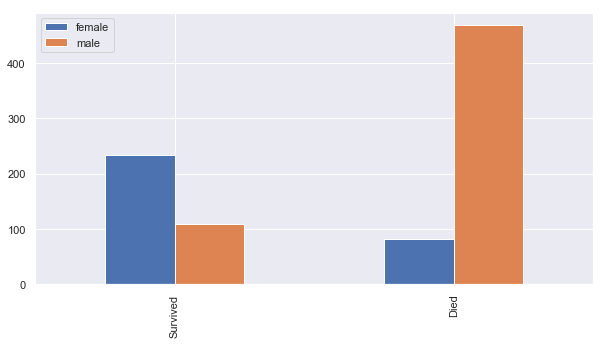

In [13]:
bar_chart('Sex')

Women are more likey to survive. Men are more likely to Die.

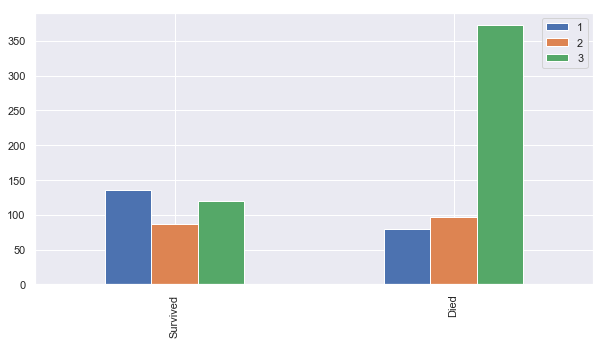

In [14]:
bar_chart('Pclass')

People with 1st Class ticket more likely to Survive.   
People with 2nd Class ticket more likely to Die.  

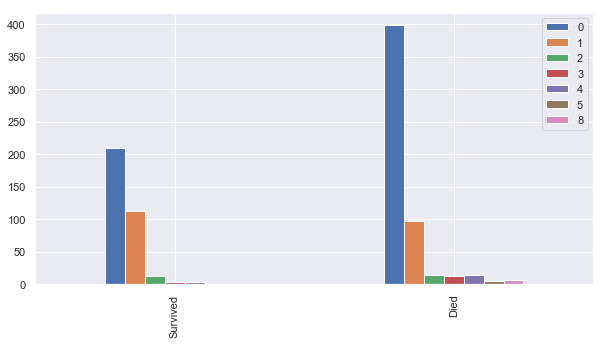

In [15]:
bar_chart('SibSp')

Person with no Sibling/Spouse or with 2 or more Sibling/Spouse is likely to Die.


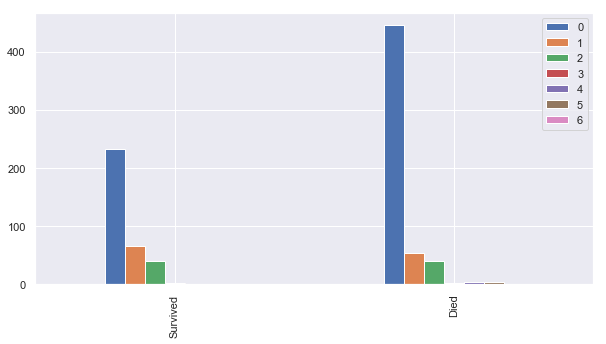

In [16]:
bar_chart('Parch')

Person with no Parent or Children is likely to Die 

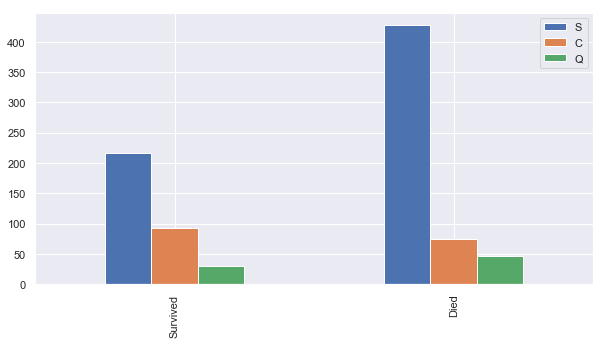

In [17]:
bar_chart('Embarked')

Person emabrked at Southampton is most likely dead

### Feature Engineering

In [18]:
# As it is difficult to find the role of each name in our prediction, we can extract the titles from the names and then 
#find the roles of each titles in our prediction. 

# Combining Train and Test data dataset
combine_set = [train, test]
for dataset in combine_set:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [19]:
train['Title'].value_counts() # 'Title' counts in training set

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Mme           1
Capt          1
Ms            1
Jonkheer      1
Sir           1
Countess      1
Lady          1
Don           1
Name: Title, dtype: int64

In [20]:
test['Title'].value_counts() # 'Title' counts in test set

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

Based on the above counts, we can map Titles as:  
Mr: 0  
Miss: 1  
Mrs: 2  
Others: 3  

    

In [21]:
# By mapping, we will convert the Title column into integer form
mapping = {"Mr":0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
          "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir":3}
for dataset in combine_set:
    dataset['Title'] = dataset['Title'].map(mapping)

In [22]:
# As we have the 'Title' column, the 'Name' column is of less use and hence can be dropped.
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [23]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [24]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


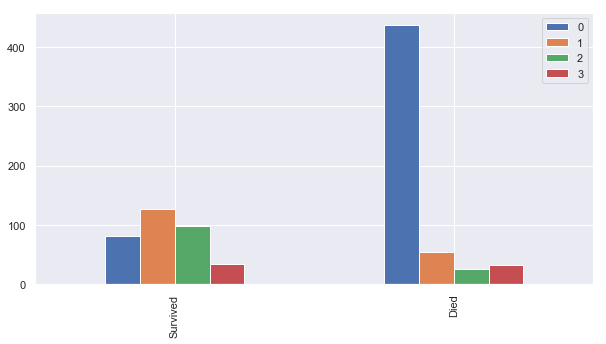

In [25]:
# Now we can visualize Title against Survived/Dead
bar_chart('Title')

Person with title 'Mr' is most likely to die. Person with title 'Miss' or 'Mrs' is most likely to survive.

In [26]:
# Convert the male and female groups to integer form
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

D:\Deep Learning\Softwares\Anaconda\envs\sirajology\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Deep Learning\Softwares\Anaconda\envs\sirajology\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Deep Learning\Softwares\Anaconda\envs\sirajology\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

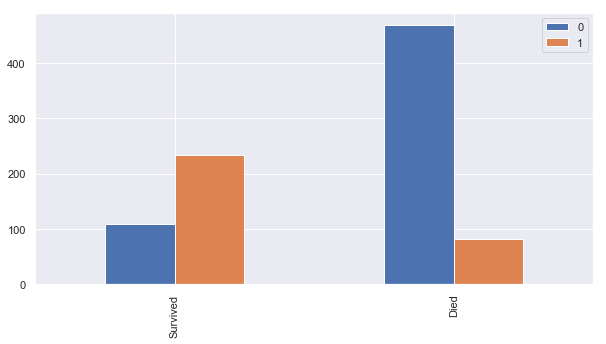

In [27]:
bar_chart('Sex')

Next, we check if the age plays any role


In [28]:
train["Age"].isnull().sum()

177

As we saw that we have values missing for Age, we'll use imputation technique to substitute each missing value with the median of the all  values.

In [29]:
train["Age"] = train["Age"].fillna(train["Age"].median())
test["Age"] = test["Age"].fillna(test["Age"].median())
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


D:\Deep Learning\Softwares\Anaconda\envs\sirajology\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


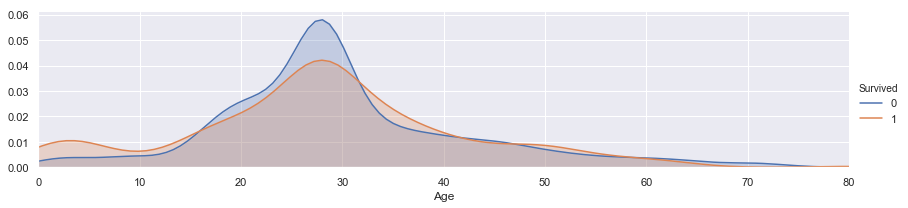

In [31]:

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()


In [32]:
combine_set[0].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [33]:
# Converting Age to a categorical variable.
for dataset in combine_set:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
combine_set[0].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


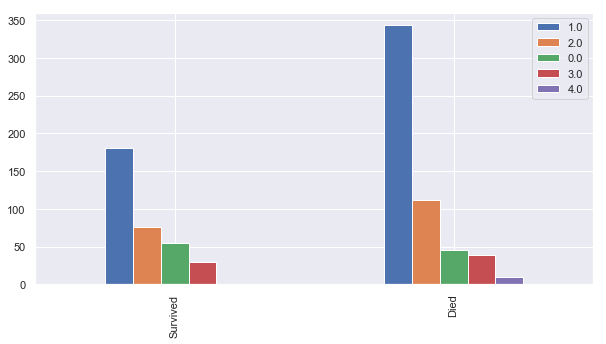

In [34]:
bar_chart('Age')

Similarly, we'll use imputation technique to substitute each missing value with the common vlaue for "Embarked" (which is "S") 

In [35]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [36]:
train["Embarked"] = train["Embarked"].fillna("S")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


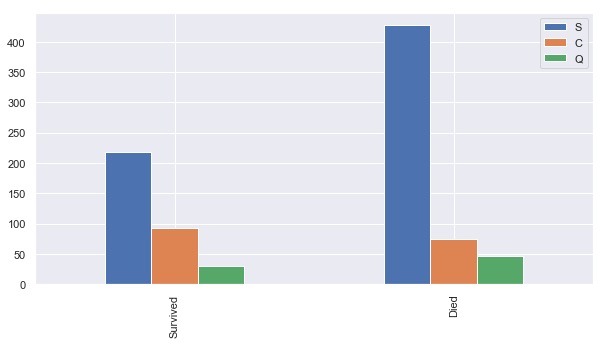

In [37]:
bar_chart('Embarked')

In [38]:
# Convert the Embarked classes to integer form
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2

D:\Deep Learning\Softwares\Anaconda\envs\sirajology\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Deep Learning\Softwares\Anaconda\envs\sirajology\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Deep Learning\Softwares\Anaconda\envs\sirajology\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

In [39]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [40]:
test.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

In [41]:
# Filling the missing Fare value with the median
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

D:\Deep Learning\Softwares\Anaconda\envs\sirajology\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


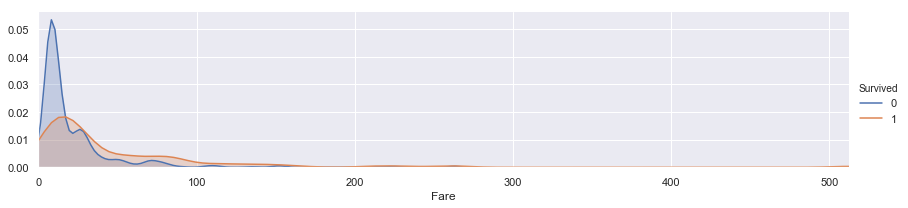

In [42]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()

D:\Deep Learning\Softwares\Anaconda\envs\sirajology\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 30)

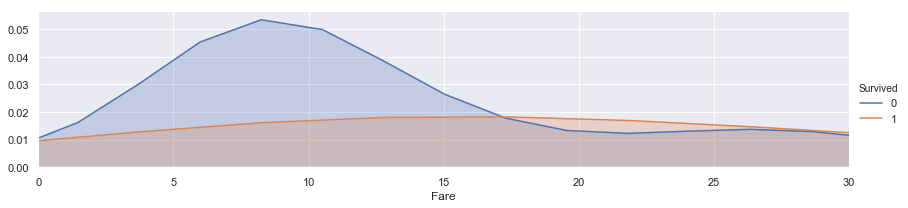

In [43]:


facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)



In [44]:


for dataset in combine_set:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3



In [45]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [46]:
# We can create a new feature "FamilySize" by combining Parch and SibSp
for dataset in combine_set:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [47]:
# Then, we can create another feature called "IsAlone" as
for dataset in combine_set:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [48]:
# Now we can drop Parch, SibSp, and FamilySize features
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine_set = [train, test]

train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,IsAlone
0,1,0,3,0,1.0,A/5 21171,0.0,NaN,0,0,0
1,2,1,1,1,2.0,PC 17599,2.0,C85,1,2,0
2,3,1,3,1,1.0,STON/O2. 3101282,0.0,NaN,0,1,1
3,4,1,1,1,2.0,113803,2.0,C123,0,2,0
4,5,0,3,0,2.0,373450,0.0,NaN,0,0,1


In [49]:
# We will also drop "PassengerId",Ticket" and "Cabin"
train = train.drop(['PassengerId','Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine_set = [train, test]

In [50]:
train.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1.0,0.0,0,0,0
1,1,1,1,2.0,2.0,1,2,0
2,1,3,1,1.0,0.0,0,1,1
3,1,1,1,2.0,2.0,0,2,0
4,0,3,0,2.0,0.0,0,0,1


In [51]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 7), (891,))

In [52]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#### Cross validation

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

#### kNN

In [54]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.73033708 0.7752809  0.7752809  0.82022472 0.86516854
 0.82022472 0.79775281 0.79775281 0.78651685]


In [55]:
# kNN Score
acc_knn = round(np.mean(score)*100, 2)
acc_knn

79.91

#### Decision Tree

In [56]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.85393258 0.80898876 0.79775281 0.88764045 0.79775281
 0.86516854 0.83146067 0.80898876 0.83146067]


In [57]:
# decision tree Score
acc_decision_tree = round(np.mean(score)*100, 2)
acc_decision_tree

83.16

#### Random Forest

In [58]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.86666667 0.80898876 0.80898876 0.78651685 0.85393258 0.78651685
 0.84269663 0.82022472 0.78651685 0.83146067]


In [59]:
# Random Forest Score
acc_random_forest = round(np.mean(score)*100, 2)
acc_random_forest

81.93

#### Naive Bayes

In [60]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.75280899 0.78651685 0.70786517 0.73033708 0.78651685
 0.76404494 0.76404494 0.79775281 0.82022472]


In [61]:
# Naive Bayes Score
acc_gaussian = round(np.mean(score)*100, 2)
acc_gaussian

76.77

#### SVM

In [62]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

D:\Deep Learning\Softwares\Anaconda\envs\sirajology\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Deep Learning\Softwares\Anaconda\envs\sirajology\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Deep Learning\Softwares\Anaconda\envs\sirajology\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning

[0.83333333 0.78651685 0.83146067 0.80898876 0.85393258 0.83146067
 0.84269663 0.85393258 0.82022472 0.79775281]


D:\Deep Learning\Softwares\Anaconda\envs\sirajology\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Deep Learning\Softwares\Anaconda\envs\sirajology\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Deep Learning\Softwares\Anaconda\envs\sirajology\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning

In [63]:
# SVM Score
acc_svc = round(np.mean(score)*100,2)
acc_svc

82.6

In [64]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Support Vector Machines'],
    'Score': [acc_knn, acc_decision_tree, acc_random_forest, acc_gaussian, acc_svc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Decision Tree,83.16
4,Support Vector Machines,82.60
2,Random Forest,81.93
0,KNN,79.91
3,Naive Bayes,76.77


### Testing

In [73]:
clf = DecisionTreeClassifier()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

D:\Deep Learning\Softwares\Anaconda\envs\sirajology\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [74]:
# Create Submission
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [72]:
#submission = pd.read_csv('submission.csv')
#submission.head()
